### Dish is Sean Connery schpeaking. You there. Come closher...

<img src="https://media1.britannica.com/eb-media/50/66150-004-A27B7E90.jpg" alt="Title" style="width: 200px; height: 200px"/>

### I want to tell you a tale of a man. A hero. Dish is the story... of James Bond (aka Sean Connery).

<img src="https://s-media-cache-ak0.pinimg.com/originals/6f/07/54/6f075401364552cfcb3caf46f9747614.jpg" alt="Title" style="width: 150px; height: 200px"/>

In [154]:
### Print out hish movies below sonny boy. I don't have all day
import urllib2
from bs4 import BeautifulSoup
import json
import pandas as pd

soup = BeautifulSoup(urllib2.urlopen('https://en.wikipedia.org/wiki/List_of_James_Bond_films').read())

table = soup.find_all('table', class_='wikitable')[0]

movie_titles = []



In [155]:
for idx, row in enumerate(table.find_all('tr')):
    if idx > 1:
        #print '<=== row ===> ' , idx
#         print row
        
        for idx2, column in enumerate(row.find_all('th')):
            #print '<=== column ===> ' , idx2
            if idx2 == 0:
                #print column.text
                split = column.text.replace('[N]','').split('!')
                #print split
                movie_titles += [split[len(split)-1]]

df = pd.DataFrame(movie_titles, columns = ['Movie_Title'])
df.head()


,Movie_Title
0,Dr. No
1,From Russia with Love
2,Goldfinger
3,Thunderball
4,Casino Royale


### That's right boy. Pull the movie's informashon from the webshite below. Just the plot, imdb shcore, poshter, and genre should do.

In [156]:
import json

bond_movie = 'The+Spy+Who+Loved+Me'
soup = BeautifulSoup(urllib2.urlopen('http://www.omdbapi.com/?y=&plot=short&r=json&t='+bond_movie).read())
parsed_json = json.loads(soup.text)

df2 = pd.DataFrame(parsed_json, index = [0])
df2[['Plot', 'imdbRating','Poster','Genre']]


,Plot,imdbRating,Poster,Genre
0,James Bond investigates the hijacking of Briti...,7.1,https://images-na.ssl-images-amazon.com/images...,"Action, Adventure, Sci-Fi"


In [157]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(url = 'img_url', width=250, height=250)

df['Movie_Title'] = [x.replace(" ","+") for x in df['Movie_Title']]

df.head()

all_movies = []
           
for movie_title in df.Movie_Title.values:
    soup = BeautifulSoup(urllib2.urlopen('http://www.omdbapi.com/?y=&plot=short&r=json&t='+movie_title).read())
    parsed_json = json.loads(soup.text)
    all_movies.append(parsed_json)

df3 = pd.DataFrame(all_movies)

print len(df3)
df3.head()

26


,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Sean Connery, Ursula Andress, Joseph Wiseman, ...",Won 1 Golden Globe. Another 4 nominations.,UK,Terence Young,"Action, Adventure, Thriller","English, French",N/A,A resourceful British government agent seeks a...,https://images-na.ssl-images-amazon.com/images...,APPROVED,07 Oct 1962,True,110 min,Dr. No,movie,"Richard Maibaum (screenplay), Johanna Harwood ...",1962,tt0055928,7.3,"117,614"
1,"Sean Connery, Daniela Bianchi, Pedro Armendári...",Nominated for 1 Golden Globe. Another 2 wins &...,UK,Terence Young,"Action, Adventure, Thriller","English, Russian, Turkish, Romany",N/A,James Bond willingly falls into an assassinati...,http://ia.media-imdb.com/images/M/MV5BMTQxNTIz...,APPROVED,27 May 1964,True,115 min,From Russia with Love,movie,"Richard Maibaum (screenplay), Johanna Harwood ...",1963,tt0057076,7.5,"89,790"
2,"Sean Connery, Honor Blackman, Gert Fröbe, Shir...",Won 1 Oscar. Another 3 wins & 6 nominations.,UK,Guy Hamilton,"Action, Adventure, Thriller","English, Chinese, Spanish",N/A,"Investigating a gold magnate's smuggling, Jame...",http://ia.media-imdb.com/images/M/MV5BMTQ2MzE0...,APPROVED,09 Jan 1965,True,110 min,Goldfinger,movie,"Richard Maibaum (screenplay), Paul Dehn (scree...",1964,tt0058150,7.8,"140,057"
3,"Sean Connery, Claudine Auger, Adolfo Celi, Luc...",Won 1 Oscar. Another 3 wins & 5 nominations.,UK,Terence Young,"Action, Adventure, Thriller","English, French",N/A,James Bond heads to The Bahamas to recover two...,https://images-na.ssl-images-amazon.com/images...,APPROVED,22 Dec 1965,True,130 min,Thunderball,movie,"Richard Maibaum (screenplay), John Hopkins (sc...",1965,tt0059800,7.0,"82,909"
4,"Daniel Craig, Eva Green, Mads Mikkelsen, Judi ...",Won 1 BAFTA Film Award. Another 25 wins & 39 n...,"UK, Czech Republic, USA, Germany, Bahamas",Martin Campbell,"Action, Adventure, Thriller","English, French",80,"Armed with a licence to kill, Secret Agent Jam...",https://images-na.ssl-images-amazon.com/images...,PG-13,17 Nov 2006,True,144 min,Casino Royale,movie,"Neal Purvis (screenplay), Robert Wade (screenp...",2006,tt0381061,8.0,"475,914"


### There were shome low times in the life of James Bond. 
#### *cough* 
#### Go on boy. Show the lowesht rated show's poster.

In [158]:
url = df3[df3.imdbRating == min(df3.imdbRating)]['Poster'].values[0]
                                                           

Image(url = url, width = 250, height = 250)
    

    

### But there were alsho high times! And glorious they were! Even though shome of them had Denise Richards. 
#### Show the highest rated show's poster. We don't have all day.

In [193]:
url2 = df3[df3.imdbRating == max(df3.imdbRating)]['Poster'].values[0]
                                                           

Image(url = url2, width = 250, height = 250)
    


### Plot his ratings over time. Has he continued to improve? Is he more badass than ever before?
#### Make a line plot with James Bonds' imdb ratings

The IMDB rating has gone down but then back up in recent years. Last Years Movie was not the best ever.


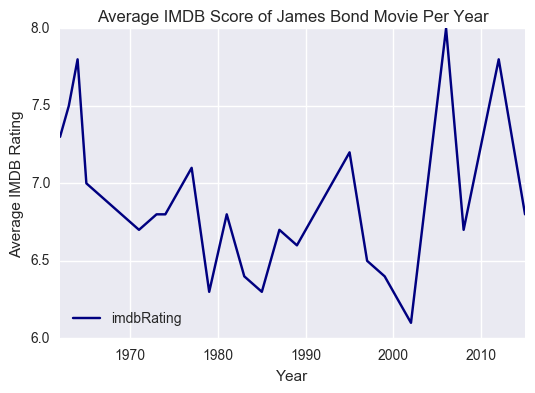

In [194]:
% matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
df3.imdbRating = df3.imdbRating.astype(float)
imdb_pivot = pd.pivot_table(df3, index = ['Year'], values = ['imdbRating'], aggfunc = 'mean')
print('The IMDB rating has gone down but then back up in recent years. Last Years Movie was not the best ever.')
imdb_pivot.plot(kind='line',title = 'Average IMDB Score of James Bond Movie Per Year',colormap='jet').set_ylabel("Average IMDB Rating")
plt.show()

#### Looks like he'sh making a comeback! And what a comeback it will be! For our last shcell we need to show the world that James Bond movies transhend all boundaries. Let'sh print a count of the genres for all of Mr. Bonds' movies.

In [210]:
genre_list = {}
genre_list2 = []
for x in df3.Genre:
    n = x.split(',')
    for y in n:
        if y in genre_list:
            genre_list[y] += 1
        else:
            genre_list[y] = 1
            
print genre_list

{u'Action': 26, u' Sci-Fi': 2, u' Adventure': 26, u' Thriller': 23}


<img src="https://media1.britannica.com/eb-media/50/66150-004-A27B7E90.jpg" alt="Title" style="width: 200px; height: 200px"/>

## And that's my shtory shonny boy. Like it or not, James Bond was a hell of a guy. This is Sean Connery signing out.